# Mnist with DNN (Three layer Neural Network)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from layer import dense, softmax_with_cross_entropy_error
from optimizer import GDoptimizer, Momentum_optimizer, Adagrad_optimizer, RMSprop_optimizer, Adam_optimizer
from actfunc import relu
from etcfunc import get_batch
from mnist.load_mnist import mnist

#### load Mnist

In [10]:
mnist = mnist()

## hyperparameter

In [11]:
learning_rate = 0.0001 # when learning_rate is over 0.002 overflow occur
momentum = 0.9
decay = 0.999
batch_size = 64
iteration = 50000
input_size = 28 * 28
layer1_output = 128
layer2_output = 64
layer3_output = 32
layer4_output = 10

## Three layer Model

In [12]:
class model():
    def __init__(self):
        self.layers = []
        self.layers.append(dense(input_size, layer1_output, activation=relu, name="layer1"))
        self.layers.append(dense(layer1_output, layer2_output, activation=relu, name="layer2"))
        self.layers.append(dense(layer2_output, layer3_output, name="layer3"))
        self.layers.append(dense(layer3_output, layer4_output, name="layer4"))
        self.errorfunc = softmax_with_cross_entropy_error()
        
    def predict(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def loss(self, X, t):
        return self.errorfunc.forward(self.predict(X), t)
    
    def backward(self):
        dout = self.errorfunc.backward()
        for layer in self.layers[::-1]:
            dout = layer.backward(dout)

In [13]:
model = model()
#optimizer = GDoptimizer(learning_rate)
#optimizer = Momentum_optimizer(learning_rate=learning_rate, momentum=momentum)
#optimizer = Adagrad_optimizer(learning_rate=learning_rate)
optimizer = RMSprop_optimizer(learning_rate=learning_rate, decay=decay) # RMSprop usually defeat by Adagrad or other algorithm when model is small
#optimizer = Adam_optimizer(learning_rate=learning_rate, momentum=momentum, decay=decay)

## Start training

In [14]:
loss_list =[]
for i in range(iteration):
    X, y = get_batch(mnist.train_images, mnist.train_labels, batchsize=batch_size)
    loss_list.append(model.loss(X, y))
    model.backward()
    optimizer.minimize(model.layers)

### loss and accuracy

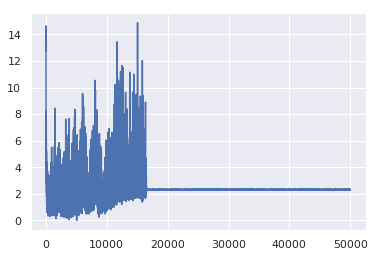

In [15]:
plt.plot(loss_list);

In [16]:
#np.argmax(model.predict(mnist.test_images), axis=1)
predict = np.argmax(model.predict(mnist.test_images), axis=1)
labels = np.argmax(mnist.test_labels, axis=1)
print("accuracy:", len(predict[predict == labels]) / len(predict))

accuracy: 0.1135
